In [5]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# imports

In [3]:
file = uproot.open('../ffNtuple_1.root')
tree = file
tree = file['ffNtuplizer/ffNtuple;5']
branches = tree.arrays()

In [4]:
# definitions (not necesssarily important definitions)

In [6]:
branches_list={}

In [3]:
file_names1 =["../ffNtuple_2Mu2E_500_5_40.root","../ffNtuple_2Mu2E_800_1p2_6.root"]
for file_name in file_names1:
    print("Opening ",file_name)
    temp_file = uproot.open(file_name)
    tree = temp_file['ffNtuplizer/ffNtuple']
    branches_list[file_name] = tree.arrays()

Opening  ../ffNtuple_2Mu2E_500_5_40.root
Opening  ../ffNtuple_2Mu2E_800_1p2_6.root


In [ ]:
file_names2 =["../ffNtuple_2Mu2E_500_0p25_2.root","../ffNtuple_2Mu2E_500_1p2_0p019.root"]
for file_name in file_names2:
    print("Opening ",file_name)
    temp_file = uproot.open(file_name)
    tree = temp_file['ffNtuplizer/ffNtuple']
    branches_list[file_name] = tree.arrays()

In [7]:
file_names3  =["../ffNtuple_2Mu2E_100_1p2_48.root","../ffNtuple_2Mu2E_200_1p2_4p8.root"]
for file_name in file_names3:
    print("Opening ",file_name)
    temp_file = uproot.open(file_name)
    tree = temp_file['ffNtuplizer/ffNtuple']
    branches_list[file_name] = tree.arrays()

Opening  ../ffNtuple_2Mu2E_100_1p2_48.root
Opening  ../ffNtuple_2Mu2E_200_1p2_4p8.root


In [ ]:
# file definitions

In [5]:
muon_p4 = vector.zip({"px": branches['muon_p4.fCoordinates.fX'],
                      "py": branches['muon_p4.fCoordinates.fY'],
                      "pz": branches['muon_p4.fCoordinates.fZ'],
                      "t": branches['muon_p4.fCoordinates.fT']})
two_muons_mask = branches['muon_n'] == 2
two_muons_p4 = muon_p4[two_muons_mask]
first_muon_p4 = two_muons_p4[:, 0]
second_muon_p4 = two_muons_p4[:, 1]
muon_sum_p4 = first_muon_p4 + second_muon_p4 
two_muons_charges = branches['muon_charge'][two_muons_mask]
opposite_sign_muons_mask = two_muons_charges[:, 0] != two_muons_charges[:, 1]
dimuon_p4 = muon_sum_p4[opposite_sign_muons_mask]
gen_p4 = vector.zip({"px": branches['gen_p4.fCoordinates.fX'],
                      "py": branches['gen_p4.fCoordinates.fY'],
                      "pz": branches['gen_p4.fCoordinates.fZ'],
                      "t": branches['gen_p4.fCoordinates.fT']}  )
gen_muon_mask = abs(branches["gen_pid"]) == 13
gen_electron_mask = abs(branches["gen_pid"]) == 11
gen_muon_p4 = gen_p4[gen_muon_mask]
gen_electrons_p4 = gen_p4[gen_electron_mask]
gen_lepsum_p4 = gen_muon_p4 [:,0] + gen_muon_p4 [:,1] + gen_electrons_p4 [:,0] + gen_electrons_p4 [:,1]

In [ ]:
# data set definitions

Opening  ../ffNtuple_2Mu2E_500_5_40.root
Opening  ../ffNtuple_2Mu2E_800_1p2_6.root


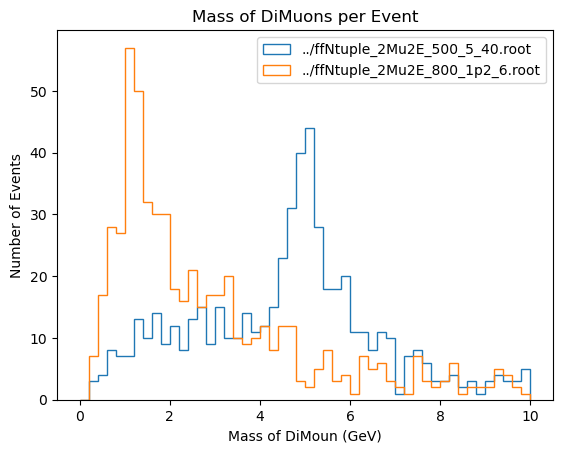

In [4]:
for file_name in file_names1:
    print("Opening ",file_name)
    branches = branches_list[file_name]
    muon_p4 = vector.zip({"px": branches['muon_p4.fCoordinates.fX'],
                          "py": branches['muon_p4.fCoordinates.fY'],
                          "pz": branches['muon_p4.fCoordinates.fZ'],
                          "t": branches['muon_p4.fCoordinates.fT']})
    two_muons_mask = branches['muon_n'] == 2
    two_muons_p4 = muon_p4[two_muons_mask]
    first_muon_p4 = two_muons_p4[:, 0]
    second_muon_p4 = two_muons_p4[:, 1]
    muon_sum_p4 = first_muon_p4 + second_muon_p4 
    two_muons_charges = branches['muon_charge'][two_muons_mask]
    opposite_sign_muons_mask = two_muons_charges[:, 0] != two_muons_charges[:, 1]
    dimuon_p4 = muon_sum_p4[opposite_sign_muons_mask]
    gen_p4 = vector.zip({"px": branches['gen_p4.fCoordinates.fX'],
                          "py": branches['gen_p4.fCoordinates.fY'],
                          "pz": branches['gen_p4.fCoordinates.fZ'],
                          "t": branches['gen_p4.fCoordinates.fT']}  )
    gen_muon_mask = abs(branches["gen_pid"]) == 13
    gen_electron_mask = abs(branches["gen_pid"]) == 11
    gen_muon_p4 = gen_p4[gen_muon_mask]
    gen_electrons_p4 = gen_p4[gen_electron_mask]
    gen_lepsum_p4 = gen_muon_p4 [:,0] + gen_muon_p4 [:,1] + gen_electrons_p4 [:,0] + gen_electrons_p4 [:,1]
    plt.hist(dimuon_p4.mass, bins=50, range=(0, 10), label = file_name,histtype='step')
plt.xlabel('Mass of DiMoun (GeV)')
plt.ylabel('Number of Events')
plt.title('Mass of DiMuons per Event')
plt.legend(loc = 'upper right')

In [ ]:
#reconstructed pretending to put in a detector, the deviaitons are background noise, calibrations and effects. the peaks are 1.2 and 5 as expected 

Opening  ffNtuple_2Mu2E_500_0p25_2.root
Opening  ffNtuple_2Mu2E_500_1p2_0p019.root


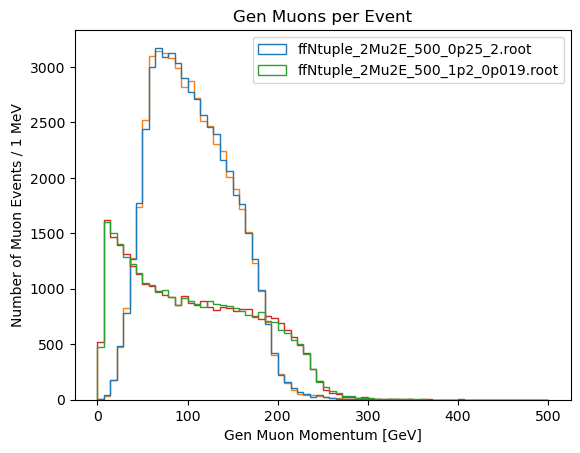

In [15]:
for file_name in file_names2:
    print("Opening ",file_name)
    branches = branches_list[file_name]
    muon_p4 = vector.zip({"px": branches['muon_p4.fCoordinates.fX'],
                          "py": branches['muon_p4.fCoordinates.fY'],
                          "pz": branches['muon_p4.fCoordinates.fZ'],
                          "t": branches['muon_p4.fCoordinates.fT']})
    two_muons_mask = branches['muon_n'] == 2
    two_muons_p4 = muon_p4[two_muons_mask]
    first_muon_p4 = two_muons_p4[:, 0]
    second_muon_p4 = two_muons_p4[:, 1]
    muon_sum_p4 = first_muon_p4 + second_muon_p4 
    two_muons_charges = branches['muon_charge'][two_muons_mask]
    opposite_sign_muons_mask = two_muons_charges[:, 0] != two_muons_charges[:, 1]
    dimuon_p4 = muon_sum_p4[opposite_sign_muons_mask]
    gen_p4 = vector.zip({"px": branches['gen_p4.fCoordinates.fX'],
                          "py": branches['gen_p4.fCoordinates.fY'],
                          "pz": branches['gen_p4.fCoordinates.fZ'],
                          "t": branches['gen_p4.fCoordinates.fT']}  )
    gen_muon_mask = abs(branches["gen_pid"]) == 13
    gen_electron_mask = abs(branches["gen_pid"]) == 11
    gen_muon_p4 = gen_p4[gen_muon_mask]
    gen_electrons_p4 = gen_p4[gen_electron_mask]
    gen_lepsum_p4 = gen_muon_p4 [:,0] + gen_muon_p4 [:,1] + gen_electrons_p4 [:,0] + gen_electrons_p4 [:,1]
    plt.hist(gen_muon_p4.pt, bins=70, range=(0, 500), label = file_name, histtype='step')
plt.xlabel('Gen Muon Momentum [GeV]')
plt.ylabel('Number of Muon Events / 1 MeV')
plt.title('Gen Muons per Event')
plt.legend(loc='upper right')

Opening  ../ffNtuple_2Mu2E_100_1p2_48.root
Opening  ../ffNtuple_2Mu2E_200_1p2_4p8.root


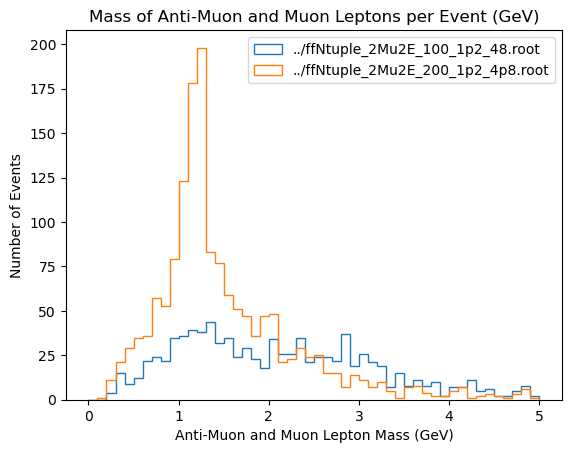

In [8]:
for file_name in file_names3:
    print("Opening ",file_name)
    branches = branches_list[file_name]
    muon_p4 = vector.zip({"px": branches['muon_p4.fCoordinates.fX'],
                          "py": branches['muon_p4.fCoordinates.fY'],
                          "pz": branches['muon_p4.fCoordinates.fZ'],
                          "t": branches['muon_p4.fCoordinates.fT']})
    two_muons_mask = branches['muon_n'] == 2
    two_muons_p4 = muon_p4[two_muons_mask]
    first_muon_p4 = two_muons_p4[:, 0]
    second_muon_p4 = two_muons_p4[:, 1]
    muon_sum_p4 = first_muon_p4 + second_muon_p4 
    two_muons_charges = branches['muon_charge'][two_muons_mask]
    opposite_sign_muons_mask = two_muons_charges[:, 0] != two_muons_charges[:, 1]
    dimuon_p4 = muon_sum_p4[opposite_sign_muons_mask]
    gen_p4 = vector.zip({"px": branches['gen_p4.fCoordinates.fX'],
                          "py": branches['gen_p4.fCoordinates.fY'],
                          "pz": branches['gen_p4.fCoordinates.fZ'],
                          "t": branches['gen_p4.fCoordinates.fT']}  )
    gen_muon_mask = abs(branches["gen_pid"]) == 13
    gen_electron_mask = abs(branches["gen_pid"]) == 11
    gen_muon_p4 = gen_p4[gen_muon_mask]
    gen_electrons_p4 = gen_p4[gen_electron_mask]
    gen_lepsum_p4 = gen_muon_p4 [:,0] + gen_muon_p4 [:,1] + gen_electrons_p4 [:,0] + gen_electrons_p4 [:,1]
    plt.hist(muon_sum_p4.mass, bins=50, range=(0,5),  label = file_name, histtype='step')
plt.xlabel('Anti-Muon and Muon Lepton Mass (GeV)')
plt.ylabel('Number of Events')
plt.title('Mass of Anti-Muon and Muon Leptons per Event (GeV)')
plt.legend(loc=('upper right'))

In [ ]:
# The mass of the lepton branch that equals the anti-muon and the muon, because they have the same expected mass the peaks are overlapping meaning the difference in boundstate mass is in the electrons

Opening  ../ffNtuple_2Mu2E_100_1p2_48.root
Opening  ../ffNtuple_2Mu2E_200_1p2_4p8.root


Text(0.5, 1.0, 'Bound State Mass per Event (GeV)')

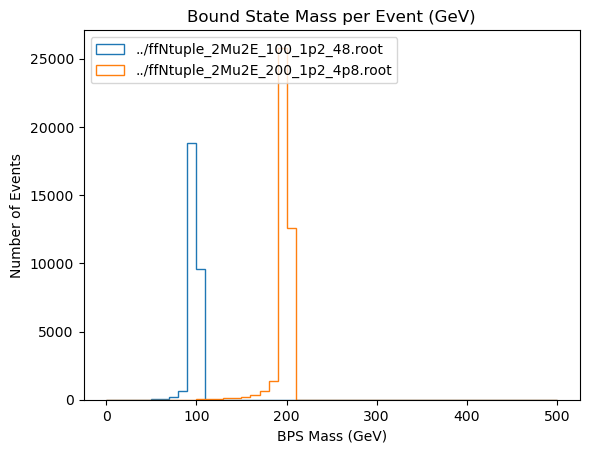

In [9]:
for file_name in file_names3:
    print("Opening ",file_name)
    branches = branches_list [file_name]
    muon_p4 = vector.zip({"px": branches['muon_p4.fCoordinates.fX'],
                      "py": branches['muon_p4.fCoordinates.fY'],
                      "pz": branches['muon_p4.fCoordinates.fZ'],
                      "t": branches['muon_p4.fCoordinates.fT']})
    two_muons_mask = branches['muon_n'] == 2
    two_muons_p4 = muon_p4[two_muons_mask]
    first_muon_p4 = two_muons_p4[:, 0]
    second_muon_p4 = two_muons_p4[:, 1]
    muon_sum_p4 = first_muon_p4 + second_muon_p4 
    two_muons_charges = branches['muon_charge'][two_muons_mask]
    opposite_sign_muons_mask = two_muons_charges[:, 0] != two_muons_charges[:, 1]
    dimuon_p4 = muon_sum_p4[opposite_sign_muons_mask]
    gen_p4 = vector.zip({"px": branches['gen_p4.fCoordinates.fX'],
                          "py": branches['gen_p4.fCoordinates.fY'],
                          "pz": branches['gen_p4.fCoordinates.fZ'],
                          "t": branches['gen_p4.fCoordinates.fT']}  )
    gen_muon_mask = abs(branches["gen_pid"]) == 13
    gen_electron_mask = abs(branches["gen_pid"]) == 11
    gen_muon_p4 = gen_p4[gen_muon_mask]
    gen_electrons_p4 = gen_p4[gen_electron_mask]
    gen_lepsum_p4 = gen_muon_p4 [:,0] + gen_muon_p4 [:,1] + gen_electrons_p4 [:,0] + gen_electrons_p4 [:,1]
    plt.hist(gen_lepsum_p4.mass, bins=50, range=(0,500),  label = file_name, histtype='step')
plt.xlabel('BPS Mass (GeV)')
plt.ylabel('Number of Events')
plt.legend(loc='upper left')
plt.title('Bound State Mass per Event (GeV)')

In [2]:
#for different files, we see a peak at 100 and 200, what we expect to see, the truth information, the genrated numbers